In [1]:
# General import
import numpy as np
from nupack import *
import random
import time

# Problem 1

Both Design 1 and Design 2 have very similar final (I$\cdot$H1 + H2) MFE structures, equilibrium probabilities, and equilibrium base-pairing probabilities. However, despite having a marginally higher free energy, Design 1 has a slightly higher probability of existing in its MFE structure in equilibrium than Design 2. These observations are not as relevant to our choice since it appears most of the structural fluctuation only appears in a small region of the final structures (blue areas around necks of big loop). Therefore, it is necessary to compare the intermediate MFE structures (I$\cdot$H1) to determine which design is better at driving the reaction forward. Based on the intermediate structure shape of Design 1, it is more ready to polymerize with H2. The larger hairpin loop in the Design 1 intermediate MFE structure, which exists > 50% of the time at equilibrium, more frequently provides the space for the second hairloop to align and polymerize. 

### Design 1: I + H1

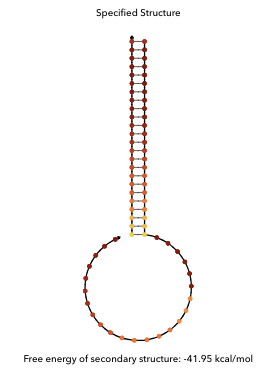
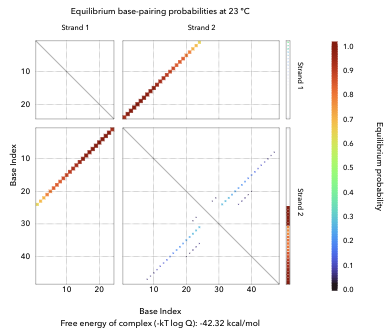

### Design 1: I$\cdot$H1 + H2

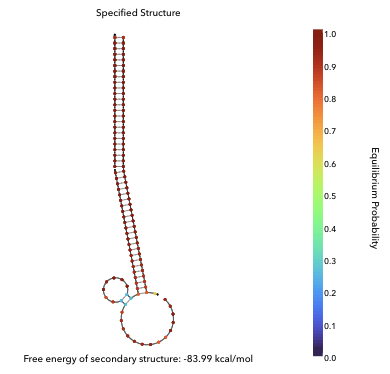
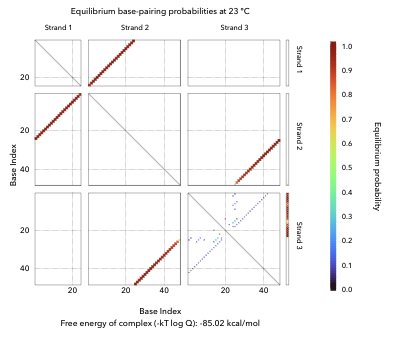

### Design 2: I + H1

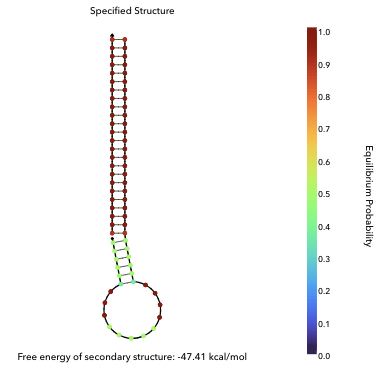
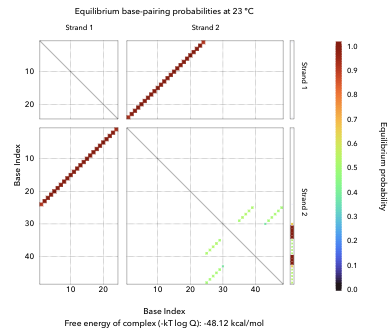

### Design 2: I$\cdot$H1 + H2

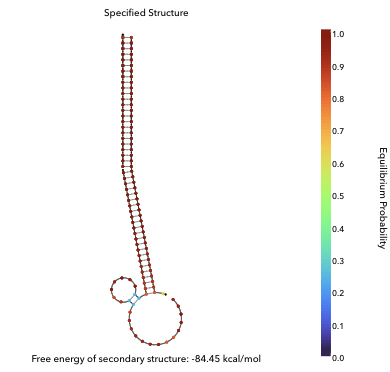
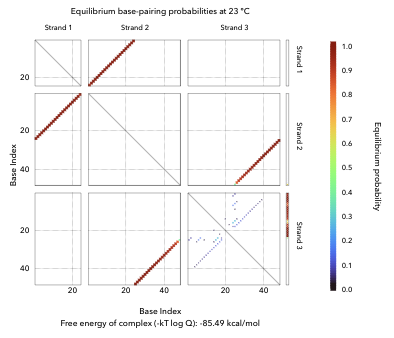

# Problem 2

a) Set $\Delta G(\phi, s) = 0$ in the partition function. The resulting function will count all of the strucures (s) in the ensemble ($\Gamma$).

b) Adapted from Dirks and Pierce, J. Comp. Chem., 24, 1664 (2003) Fig6 pseudocode

In [291]:
# matching pairs
matches = {'A': 'T', 'T': 'A', 'G':'C', 'C': 'G'}

# calculate no. possible secondary structures in an emsemble for seq
def calc_gamma(seq):
    N = len(seq)
    
    # initalize Q, Q_b, Q_m
    Q = np.zeros((N+1, N+1))
    Q_b = np.zeros((N+1, N+1))
    Q_m = np.zeros((N+1, N+1))

    for i in range(1, N+1): #nucleotides can't pair w themselves (off-diagonal ones)
        Q[i, i-1] = 1
    
    for l in range(1, N+1): #(all possible indices)
        for i in range(1, N - l +2): #(all possible indices)
            j = i + l - 1
            if seq[j-1] == matches[seq[i-1]]: # check if i paired to j for Q_b recursion
                Q_b[i,j] = 1 
                for d in range(i+1, j-4):
                    for e in range(d+4, j):
                        Q_b[i,j] += Q_b[d, e]
                        Q_b[i,j] += Q_m[i+1, d-1]*Q_b[d, e]
            Q[i,j] = 1
            for d in range(i, j-3):
                for e in range(d+4, j+1):
                    Q[i,j] += Q[i,d-1]*Q_b[d,e]
                    Q_m[i,j] += Q_b[d,e]
                    Q_m[i,j] += Q_m[i,d-1]*Q_b[d,e]
    return Q[1,N]

In [85]:
# sequenceg given in 2b
s = 'CGAGATACCTCGATCACGCG'

print(calc_gamma(s))

971.0


c) Generate 5 random sequences of length N and plot

In [49]:
# Generate 5 random sequences of length N
import string
import random

N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

nt = 'ATCG'

lens = []
gamma = []

for n in range(0,len(N)):
    for i in range(0,5):
        rand_seq = ''.join(random.choices(nt, k=N[n]))
        lens.append(len(rand_seq))
        gamma.append(calc_gamma(rand_seq))

[10, 10, 10, 10, 10, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 60, 60, 60, 60, 60, 70, 70, 70, 70, 70, 80, 80, 80, 80, 80, 90, 90, 90, 90, 90, 100, 100, 100, 100, 100]
[5.0, 7.0, 6.0, 4.0, 6.0, 544.0, 742.0, 666.0, 1029.0, 638.0, 182108.0, 119929.0, 51952.0, 44459.0, 31764.0, 7758123.0, 21744752.0, 4535377.0, 17035747.0, 16347681.0, 2394706760.0, 2917438931.0, 4138851036.0, 4897412560.0, 577580646.0, 117832196736.0, 551235976769.0, 525226276487.0, 714578738973.0, 117156709100.0, 9467372322210.0, 42246745680865.0, 163400327952185.0, 45357715834718.0, 33682663807383.0, 2.1158386593634676e+16, 3075082917210750.0, 1.2793543287775564e+16, 7138406710178015.0, 2146101103299102.0, 1.5054426145750088e+18, 1.7804522799519012e+18, 4.675667161714848e+18, 4.719894401302446e+18, 3.970087984622414e+18, 4.10959521918016e+20, 1.742229332284924e+20, 9.45196406979566e+20, 7.163461832718013e+20, 2.730512048093927e+20]


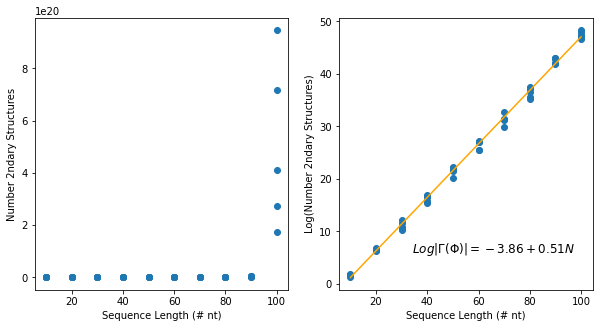

In [84]:
# Plotting
import matplotlib.pyplot as plt

# line of best fit
b,m = np.polyfit(lens, np.log(gamma), 1)
lobf = m + np.array(lens)*b

# create fig
fig, axs = plt.subplots(1,2,figsize=(10, 5))

# plotting
axs[0].scatter(lens, gamma)
axs[0].set_xlabel('Sequence Length (# nt)')
axs[0].set_ylabel('Number 2ndary Structures')

axs[1].scatter(lens, np.log(gamma))
axs[1].plot(lens, lobf, c = 'orange')
axs[1].set_xlabel('Sequence Length (# nt)')
axs[1].set_ylabel('Log(Number 2ndary Structures)')
axs[1].annotate('$Log|\Gamma(\Phi)|= {} + {}N$'.format(round(m,2), round(b,2)), (30, 25),
            xytext=(0.93, 0.18), textcoords='axes fraction',
            fontsize=12,
            horizontalalignment='right', verticalalignment='top')


fig.show()

# Problem 3

In [345]:
# structure in dot-parens notation
phi = '..((((((((..((((((((((...))))))(((.........)))((((((...))))))))))..((((((((...)))))))))))))))).'
N = len(phi)
f_stop = 0.01
S = Structure(phi).matrix()

# matching pairs
matches = {'A': 'U', 'U': 'A', 'G':'C', 'C': 'G'}

In [346]:
model = Model(material = 'rna', celsius = 23)

a) Generate 5 random sequences that satisfy the base-pairing requirements of the stick figure

In [361]:
# Generate 5 random sequences that satisfy the base-pairing requirements of the stick figure

seqs = []

for i in range(5):
    seqq = list(np.zeros(N)) # define empty sequence
    seqq[0] = list(matches.keys())[random.randrange(0, 4)] # first position is random nt
    for j in range(1,N):
        
        jj = PairList(phi)[j] # find base pair
        nt = list(matches.keys())[random.randrange(0, 4)]
        
        if j == jj: #nt unpaired
            seqq[j] = nt

        else: # if nt is paired, update base pair as well
            seqq[j] = nt
            seqq[jj] = matches[nt]
    seqs.append(''.join(seqq))
    print(seqs[i])


UCGAGGAUUAAGUUCCCGACUUCUAAAGUCGGGUAGAAAGCCUACCCCCUCAAAAUGAGGGGGAAGUUCCGGCUAACGUAGCCGGAUAAUCCUCA
GUAUCACUUAAGUAGACAAUUCACUGAAUUGGUGGGCACUGACCACCUAUCGGGACGAUAGUCUAAUGAUUUUCUUCGAGAAAAUCUAAGUGAUC
GGGCUGUUAUAACGCGCACGACUGUGUCGUGUUAUAAAGCUCGUAAGGCCUGUUGCAGGCCCGCGGGGGUAGCAUACCAUGCUACCAUAACAGCU
CGUCGCUGCUUGCGCCCUCAAAACAUUUGAGAACAACAAGAUGGUUACAACUGGUAGUUGUGGCGUAUUCCAUUGAGACAAUGGAAAGCAGCGAG
AGUGUUUGCGAUAGCCCAAAUAAAGUAUUUGGUCUCCUCACGAGACCGGGAGCCUCUCCCGGGCUGACGUCGUCCUUUGGACGACGCGCAAACAA


In [354]:
def MFE_defect(seq):
    return N - (mfe(seq, model)[0][0].matrix() * S).sum()

In [355]:
def ensemble_defect(seq):
    return N - (pairs(strands = [seq], model=model).to_array()*S).sum()

In [356]:
def mutate(seq):
    seq = list(seq)
    # generate random position in sequence + random nt
    i = random.choice(range(N))
    j = random.choice(range(4))
    new_nt = list(matches.keys())[j]
    
    ii = PairList(phi)[i] # find base pair
    
    if i == ii: # nt unpaired
        if new_nt != seq[i]:
            seq[i]=new_nt
        else:
            seq[i]=list(matches.keys())[j-1]
   
    else: # if nt is paired, update base pair as well
        if new_nt != seq[i]:
            seq[i]=new_nt
            seq[ii]=matches[seq[i]]
        else:
            seq[i]=list(matches.keys())[j-1]
            seq[ii]=matches[seq[i]]

    return ''.join(seq)

b) MFE defect optimization to design five sequences that satisfy the MFE defect stop condition

In [362]:
# MFE defect optimization

# runtime clock
t = time.time()

for seq in seqs[:5]:
    max_mutation = 0;
    error = MFE_defect(seq)
    while error > f_stop*N and max_mutation < N**2:
        trial_sequence = mutate(seq)
        new_error = MFE_defect(trial_sequence)

        if (new_error < error*1.05):
            seq = trial_sequence
            error = new_error
            max_mutations = 0
        else:
            max_mutation +=1
    seqs.append(seq)
    print('{seq} \t error: {error:.1f} \t max_mutation: {mm}'.format(i = i+1, seq = seq, error = error, mm = max_mutation))
print('Run Time: {}'.format(time.time()-t))

ACACACCAUGUAGGGCCAAUACGCCGUAUUGCUUACACAGACAAAGCUCUCACAUUGAGAGGCCCGAACUGCUUUUGGAAAGCAGUCAUGGUGUA 	 error: 0.0 	 max_mutation: 46
UACGAUAUACAGGCUGCCAAAUUCUAUUUGGGCUGCAUUAAAAAGCCAGUCGACUCGACUGCAGCGACAUAAAGGAGACCUUUAUGGUAUAUCGG 	 error: 0.0 	 max_mutation: 306
UUAGGUUAGCGACCGGGGACGCACAGCGUCCAUCUCACUAAACGAUGUCCCCUUCGGGGACCCGGGACGCCGCACACUGUGCGGCGGCUAACCUC 	 error: 0.0 	 max_mutation: 157
UAUACCUCGGCCACCGAAUCUCAUGGAGAUUAGCUUCAUACAUGCUUUCCUAGAAUAGGAACGGUACGCGAUGUUUGGAACAUCGCCCGAGGUAG 	 error: 0.0 	 max_mutation: 303
GAGCUCAGGCACUGGCCACGUGUCUCACGUGCAAAUUACACCCUUGCCGACUUAAAGUCGGGCCACAAUGCUUAAUCGUUAAGCAUGCCUGAGCA 	 error: 0.0 	 max_mutation: 338
Run Time: 13.714637279510498


c) Ensemble defect optimization to design five sequences that satisfy the ensemble defect stop condition

In [363]:
# Ensemble defect optimization

# runtime clock
t = time.time()

for seq in seqs[:5]:
    max_mutation = 0;
    error = ensemble_defect(seq)
    while error > f_stop*N and max_mutation < N**2:
        trial_sequence = mutate(seq)
        new_error = ensemble_defect(trial_sequence)

        if (new_error < error*1.05): 
            seq = trial_sequence
            error = new_error
            max_mutations = 0
        else:
            max_mutation +=1
    seqs.append(seq)
    print('{seq} \t error: {error:.3f} \t max_mutation: {mm}'.format(seq = seq, error = error, mm = max_mutation))
print('Run Time: {}'.format(time.time()-t))

AAGUCAAGCCUAGAGGCCCCGGACCCCGGGGGAGAACGCGCCACUCGUAUCAGGCUGAUACCCUCGUGACGAUGCAGUGCAUCGUCGGCUUGACG 	 error: 0.846 	 max_mutation: 187
UAGUAGAAUGUCGGACCAUUUCUCAGAAAUGCAGGAAAACAAGCUGGGGUCCGUCGGACCCGUCCAACGAGACAGUAUCUGUCUCGCAUUCUACG 	 error: 0.339 	 max_mutation: 358
UUCUGCUGAGUACCUGGGGUCCUCCGGACCCGUCAAAUUUUAGGACCCUCGCUUCGCGAGGCAGGAACGAAUCCCCUAGGGAUUCGCUCAGCAGU 	 error: 0.747 	 max_mutation: 201
AGGGGAUUGGAACCGCCUGUACGCUGUACAGCCCAGACAAGUAGGGAAGAGCCGAGCUCUUGCGGAAGAGACUGGAGGCCAGUCUCCCAAUCCCG 	 error: 0.534 	 max_mutation: 404
CUGGGAGGUUGGGCACCUCACGCUACGUGAGCACGGAGAAAGGGUGGUAUCCAAAGGAUACGUGCAACCUGGAGGCAACCUCCAGGAACCUCCCC 	 error: 0.901 	 max_mutation: 481
Run Time: 50.07677483558655


d)  Calculate ∆G(φ, s), p(φ, s), µ(φ, s), and n(φ, s) and GC content

In [364]:
# Calculate ∆G(φ, s), p(φ, s), and GC content

def calc_dG(s): # ∆G(φ, s)
    return structure_energy(strands=[s], structure= phi, model= model)

def calc_p(s): # p(φ, s)
    return structure_probability(strands=[s], structure=phi, model=model)

def GC_count(s): # GC content
    c = s.count('C')
    g = s.count('G')
    return c + g

In [365]:
#  Run for each sequencee 

ress = []

for i, seq in enumerate(seqs):
    
    u = MFE_defect(seq)
    n = ensemble_defect(seq)
    dG = calc_dG(seq)
    p = calc_p(seq)
    gc = GC_count(seq)
    
    if i == 0:
        print('Random Sequences')
    elif i == 5:
        print('MFE Defect Optimization Sequences')
    elif i == 10:
        print('Ensemble Defect Optimization Sequences')
        
    if i < 15:    
        print('MFE defect: {u:.3f} \t Ensemble defect: {n:.3f} \t dG: {dG:.3f} \t p: {p:.3f} \t # GC: {gc}' \
              .format(u = u, n =n, dG = dG, p=p, gc=gc))

Random Sequences
MFE defect: 21.000 	 Ensemble defect: 22.789 	 dG: -39.897 	 p: 0.000 	 # GC: 48
MFE defect: 29.000 	 Ensemble defect: 32.741 	 dG: -21.361 	 p: 0.000 	 # GC: 38
MFE defect: 56.000 	 Ensemble defect: 56.607 	 dG: -38.364 	 p: 0.000 	 # GC: 52
MFE defect: 43.000 	 Ensemble defect: 37.723 	 dG: -30.545 	 p: 0.000 	 # GC: 45
MFE defect: 32.000 	 Ensemble defect: 31.866 	 dG: -40.924 	 p: 0.000 	 # GC: 52
MFE Defect Optimization Sequences
MFE defect: 0.000 	 Ensemble defect: 35.694 	 dG: -35.406 	 p: 0.043 	 # GC: 46
MFE defect: 0.000 	 Ensemble defect: 14.799 	 dG: -35.377 	 p: 0.229 	 # GC: 42
MFE defect: 0.000 	 Ensemble defect: 24.065 	 dG: -52.319 	 p: 0.141 	 # GC: 61
MFE defect: 0.000 	 Ensemble defect: 25.211 	 dG: -35.861 	 p: 0.070 	 # GC: 46
MFE defect: 0.000 	 Ensemble defect: 4.277 	 dG: -40.419 	 p: 0.247 	 # GC: 50
Ensemble Defect Optimization Sequences
MFE defect: 0.000 	 Ensemble defect: 0.846 	 dG: -48.024 	 p: 0.674 	 # GC: 60
MFE defect: 0.000 	 Ensembl

Based on the above metrics, ensemble defect optimization is the better design strategy. The advantage of using ensemble defect is that it implicitly optimizes MFE defect. As a negative design method, MFE defect optimization works to eliminate competing structures under the assumption that the MFE structure dominates the ensemble, which is not necessarily true. Conversely, by combining elements of positive and negative design, ensemble defect optimization is able to circumvent such assumptions. It also generally results in more negative structure free energies and higher equilibrium probabilities of the sequence existing in the target structure. However, ensemble defect optimization generally takes longer to run because it is a more complex calculation (no simplications made by $\delta$ functions). Furthermore, ensemble defect tends to increase the CG content compared to the starting structure, which generally results in more stable structures but can increase nucleotide mismatching in extreme cases.

### e)  Analysis of best design in Nupack

The best design is the 2nd ensemble defect optimization design (UAGUAGAAUGUCGGACCAUUUCUCAGAAAUGCAGGAAAACAAGCUGGGGUCCGUCGGACCCGUCCAACGAGACAGUAUCUGUCUCGCAUUCUACG, n = 0.339).

At equilibrium at 23$^{\circ}C$, all its bases are paired (or unpaired) with probabilities of approximately 1 (see first image below).

However, in a test tube, this sequence forms dimers with a high probability (second and third images).

When the temperature of the test tube is increased from 20-95$^{\circ}C$ to generate a melt curve (fourth image), one long transition appears. This transition begins with the dimer decomposing into the monomer in the target structure. Around 60$^{\circ}C$, one of the monomer's arms opens to form a large loop (fifth figure). As the temperature is increased, more branches open and the loop grows. A similar phenomenon occurs with the dimer, but at higher temperatures it exists at lower concentrations.

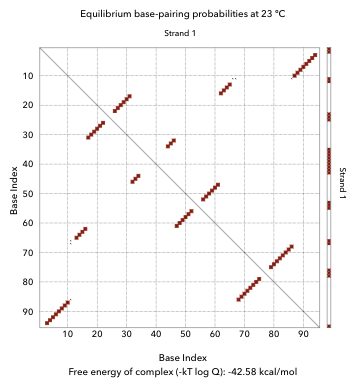

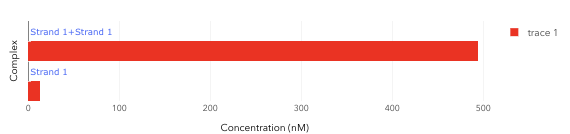

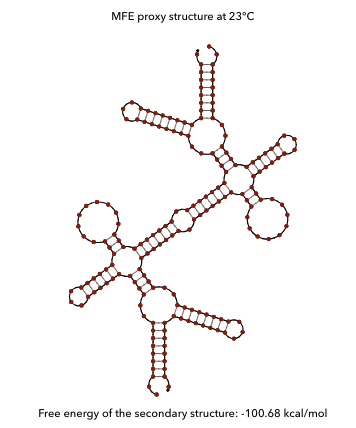

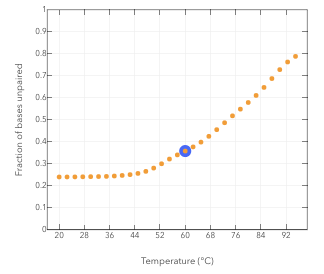

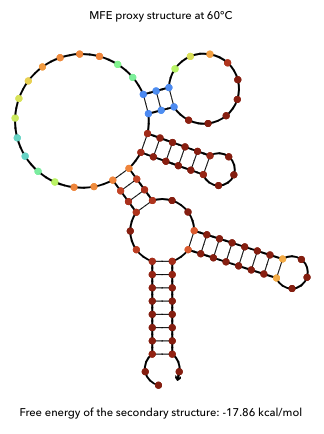

In [41]:
# f) minimize objective fxn, probability fxn in Nupack 
model = Model(material = 'rna', celsius = 23)

# matching pairs
matches = {'A': 'U', 'U': 'A', 'G':'C', 'C': 'G'}

phi1 = '((((((((((..........))))))))))..........'
phi2 = '......(((((((((((((........)))))))))))))'

N = len(phi1)

S1 = Structure(phi1).matrix()
S2 = Structure(phi2).matrix()

# User-defined stop condition
f_stop = 0.01

def two_targets(s):
    z1 = structure_probability(strands=[s], structure=phi1, model=model) - 0.5
    z2 = structure_probability(strands=[s], structure=phi2, model=model) - 0.5
    return abs(z1)+abs(z2) # can't multiple bc one zero will cancel botth


The objective function needs to achieve the target probabilities simultaneously. One way to accomplish this is to define a new variable z, which is the current probability minus the target probability $z = p - 0.5$, for both target structures. Then, one needs to find an expression that can be manipulated to minimize both z's, which is approached by taking the absolute value of each and adding them together. The absolute value is necessary to ensure that the values don't cancel each other out if they are of opposite signs.

In [42]:
# generate random starting sequence

def gen():
    seq = list(np.zeros(N)) # define empty sequence
    for i in range(N):
        j = random.choice(range(4))
        new_nt = list(matches.keys())[j]
        seq = gen_helper(seq, i, new_nt, 0)
    
    return ''.join(seq)
    
# 0 initial call
# 1 phi1 call
# 2 phi2 call

def gen_helper(seq, i, nt, call):
    ii = PairList(phi1)[i]
    jj = PairList(phi2)[i]
    seq[i] = nt
    comp = matches[nt]
    
    if ii != i and call != 1: # paired in structure 1
        seq = gen_helper(seq, ii, comp, 1)
    if jj != i and call !=2: # paired in structure 2
        seq = gen_helper(seq, jj, comp, 2)
            
    return seq

In [43]:
def mutate(seq):
    seq = list(seq)
    i = random.choice(range(N))
    j = random.choice(range(4))
    new_nt = list(matches.keys())[j]
    seq = mutate_helper(seq, i, new_nt, 0)
    
    return ''.join(seq)
    
# 0 initial call
# 1 phi1 call
# 2 phi2 call

def mutate_helper(seq, i, nt, call):
    ii = PairList(phi1)[i]
    jj = PairList(phi2)[i]
    seq[i] = nt
    comp = matches[nt]
    
    if ii != i and call != 1: # paired in structure 1
        seq = mutate_helper(seq, ii, comp, 1)
    if jj != i and call !=2: # paired in structure 2
        seq = mutate_helper(seq, jj, comp, 2)
            
    return seq
    

In [79]:
# generate initial seq
seq = gen()
print(seq)

UAUUGGUAGGGCCGUGUAUACCUACCAAUACACGGCCCUA


In [80]:
# runtime clock
t = time.time()

max_mutation = 0;
error = two_targets(seq)
while error > f_stop and max_mutation < N**2:
    trial_sequence = mutate(seq)
    new_error = two_targets(trial_sequence)

    if (new_error < error*1.2): # 1.2 is good trade off b/t run time and accuracy
        seq = trial_sequence
        error = new_error
        max_mutations = 0
    else:
        max_mutation +=1
        

print(seq + '\t two_targets: '+ str(error) + ' \t max_mutation: ' + str(max_mutation))
    
print('Run Time: {}'.format(time.time()-t))

GUGCCGGUUCGGAAAAGUGAGAACCGGCACUUUUCCGAAC	 two_targets: 0.09924824674285831 	 max_mutation: 178
Run Time: 5.1147284507751465


In [81]:
p1 = structure_probability(strands=[seq], structure=phi1, model=model)
p2 = structure_probability(strands=[seq], structure=phi2, model=model)

print(p1)
print(p2)

0.42703297743874274
0.5262812241816011


Looking at the equilibrium pair probabilities matrix in Nupack (below image), two structures appear. Each nucleotide in each structure has approximately 0.5 equilibrium probability, except one which is common to both structures.

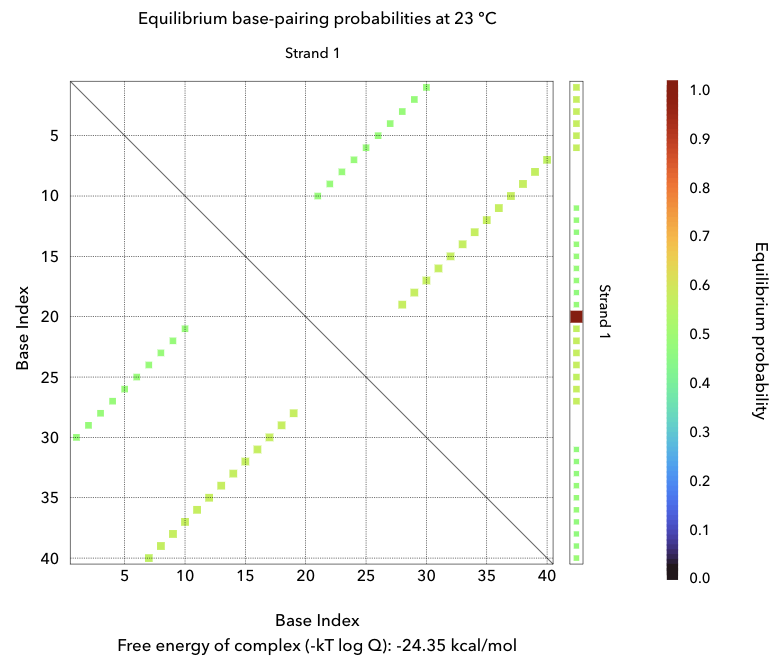

# Problem 4

The melt curve (below) has two distinct transitions. The first transition (59-71$^{\circ}C$) appears as the initial dominant species A+B+C dissociates into its components A, B, and C. This is best shown by the concentrations of the species at equilibrium at 65$^{\circ}C$ (red bar graph below). At approximately 65$^{\circ}C$, the individual amounts of A, B, or C surpass the concentration of the starting species (A+B+C). The second transition (80-95$^{\circ}C$) appears as the individual species A, B, and C collapse from their secondary structures into unpaired strands of nucleotides. This is best observed by the below images of species C between 80$^{\circ}C$ (secondary structure with high probabilities of paired nucleotides) and 90$^{\circ}C$ (no secondary structure).

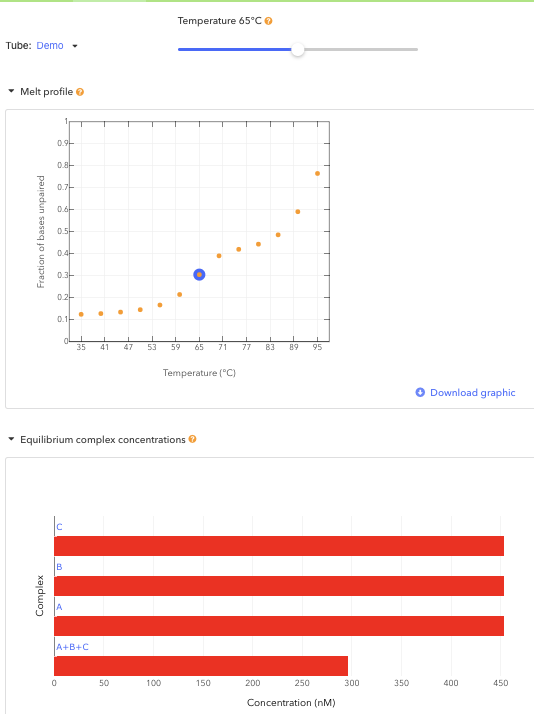

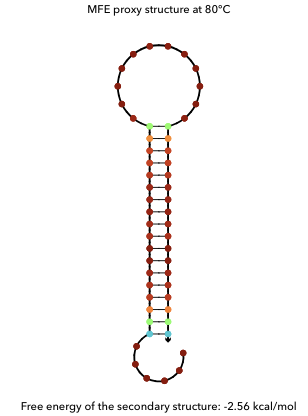
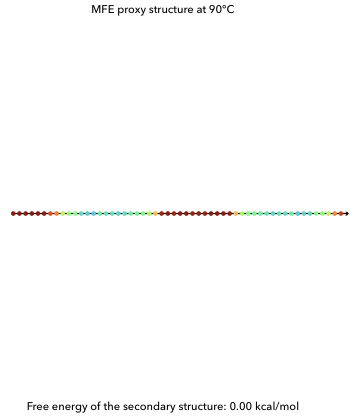